# Task I: Setup & Data Preparation



##A. Header

Multi-Layer Perceptron and Support Vector Machines

Abdulrahman Abed

03/24/2022 

###Packages & Random Seed

In [ ]:
# Mathematics and Statistics Packages
import numpy as np
import pandas as pd

# Graphical Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Colab Packages
from google.colab import drive
from google.colab import data_table

# Data Preparation Packages
from sklearn.model_selection import train_test_split, cross_validate

# Modeling Packages: Multi-Layer Perceptron (MLP) and Support Vector Classifier (SVC)
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Hyperparameter Tuning Packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Model Evaluation Packages
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support

# Suppress Warning Messages
import warnings
warnings.filterwarnings('ignore')

random_state = 0

###Calculate Model Size Function

In [ ]:
def number_of_parameters(model_name):
  coefficients_list = model_name.coefs_
  number_of_hidden_layers = len(coefficients_list)
  parameter_count = 0
  for i in range(0,number_of_hidden_layers):
    parameter_count += model_name.coefs_[i].size + model_name.intercepts_[i].size
  return parameter_count

##B. Import Data



In [ ]:
# Mount the Google Drive and Import the Data
%%capture
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Data_Sets/CD_additional_modified-v2.csv')

##C. View Overall Structure & Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4117 non-null   int64  
 1   age             4117 non-null   int64  
 2   job             4117 non-null   object 
 3   marital         4117 non-null   object 
 4   education       4117 non-null   object 
 5   default         4117 non-null   object 
 6   housing         4117 non-null   object 
 7   loan            4117 non-null   object 
 8   contact         4117 non-null   object 
 9   month           4117 non-null   object 
 10  day_of_week     4117 non-null   object 
 11  duration        4117 non-null   int64  
 12  campaign        4117 non-null   int64  
 13  pdays           4117 non-null   int64  
 14  previous        4117 non-null   int64  
 15  poutcome        4117 non-null   object 
 16  emp_var_rate    4117 non-null   float64
 17  cons_price_idx  4117 non-null   f

In [ ]:
df.describe(include='all')

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,4117.000000,4117.000000,4117,4117,4117,4117,4117,4117,4117,4117,...,4117.000000,4117.000000,4117.000000,4117,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117
unique,NaN,NaN,12,4,7,2,3,3,2,10,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,admin.,married,university.degree,no,yes,no,cellular,may,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,1012,2508,1264,3314,2175,3347,2650,1378,...,NaN,NaN,NaN,3522,NaN,NaN,NaN,NaN,NaN,3666
mean,2058.193102,40.115375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.537042,960.403449,0.190187,NaN,0.085742,93.580131,-40.500947,3.621904,5166.496502,NaN
std,1188.913501,10.314847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.568668,191.967524,0.541765,NaN,1.562799,0.579061,4.593445,1.733448,73.670942,NaN
min,0.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN
25%,1029.000000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN
50%,2058.000000,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,3087.000000,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
df.head(30)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,1,39,services,single,high.school,no,no,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,2,25,services,married,high.school,no,yes,no,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,4,47,admin.,married,university.degree,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,5,32,services,single,university.degree,no,no,no,cellular,sep,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,6,32,admin.,single,university.degree,no,yes,no,cellular,sep,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,8,31,services,divorced,professional.course,no,no,no,cellular,nov,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


##D. Extract Target Variable 

In [ ]:
y_target = df.pop('y')

##E. Index Target Variable

In [ ]:
y_target = pd.get_dummies(y_target,drop_first=True)

##F. Drop Unnecessary Columns & Convert Variables

In [ ]:
# Dropping Unnamed here because it's just acting as another index variable
df = df.drop(columns = 'Unnamed: 0')

In [ ]:
# Converting Ints to Floats & Objects to Category Datatypes

integer_columns_list = list(df.select_dtypes(include='int64').columns)
df[integer_columns_list] = df[integer_columns_list].astype('float')
object_columns_list = list(df.select_dtypes(include='object').columns)
df[object_columns_list] = df[object_columns_list].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             4117 non-null   float64 
 1   job             4117 non-null   category
 2   marital         4117 non-null   category
 3   education       4117 non-null   category
 4   default         4117 non-null   category
 5   housing         4117 non-null   category
 6   loan            4117 non-null   category
 7   contact         4117 non-null   category
 8   month           4117 non-null   category
 9   day_of_week     4117 non-null   category
 10  duration        4117 non-null   float64 
 11  campaign        4117 non-null   float64 
 12  pdays           4117 non-null   float64 
 13  previous        4117 non-null   float64 
 14  poutcome        4117 non-null   category
 15  emp_var_rate    4117 non-null   float64 
 16  cons_price_idx  4117 non-null   float64 
 17  cons_conf_idx 

##G. One-Hot Encoding

In [ ]:
category_columns_list = object_columns_list
float_columns_list = integer_columns_list
onehot_df = pd.get_dummies(df,columns=category_columns_list)

In [ ]:
onehot_df.shape

(4117, 61)

##H. Train/Test Split

In [ ]:
df['y_target'] = y_target
onehot_df['y_target'] = y_target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(onehot_df.drop('y_target',axis=1),onehot_df['y_target'],test_size=0.2,random_state=random_state)

# Task II: Multi-Layer Perceptron Architecture Tuning

##(a) Hidden layer w/ 25 neurons

###Pipeline

In [ ]:
# Define
model = MLPClassifier(random_state=random_state, hidden_layer_sizes=(25))
# Fit
model = model.fit(X_train,y_train)
# Architecture
print("MODEL ARCHITECTURE")
print("Number of Layers: "+str(model.n_layers_))
print("Number of Input Variables: "+str(model.n_features_in_))
print("Weight Coefficient Matrix Shape 1: "+str(model.coefs_[0].shape))
print("Weight Coefficient Matrix Shape 2: "+str(model.coefs_[1].shape))
print("Bias Coefficient Vector Size 1: "+str(model.intercepts_[0].shape))
print("Bias Coefficient Vector Size 2: "+str(model.intercepts_[1].shape))
print("Total Number of Parameters: "+str(number_of_parameters(model)))
print("Number of Output Variables: "+str(model.n_outputs_))
print("Output Classes: "+str(model.classes_))
print("Output Activation Function: "+str(model.out_activation_))
print("\n")
# Training
print("MODEL TRAINING")
print("Number of Training Iterations: "+str(model.n_iter_))
print("Total Number of Training Samples: "+str(model.t_))
print("Current Loss: "+str(model.loss_.round(5)))
print("Minimum Loss: "+str(model.best_loss_.round(5)))
print("\n")
plt.plot(model.loss_curve_)
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()
# Predict
predictions_test = model.predict(X_test)
# Evaluate
con_mat_test = confusion_matrix(y_test,predictions_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_test))

NameError: ignored

###Cross-validation

In [ ]:
model_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(25))
model_cv_results = pd.DataFrame(cross_validate(model_cv,X_train,y_train,cv=5,return_train_score=True,scoring=['accuracy',
                                                                                                              'precision',
                                                                                                              'recall',
                                                                                                              'f1']))
model_cv_results = model_cv_results.drop(columns='score_time')
model_cv_results.loc['mean'] = model_cv_results.mean()
model_cv_results

##(b) 2 Hidden layers w/ 25 neurons ea.

###Pipeline

MODEL ARCHITECTURE
Number of Layers: 4
Number of Input Variables: 61
Weight Coefficient Matrix Shape 1: (61, 25)
Weight Coefficient Matrix Shape 2: (25, 25)
Weight Coefficient Matrix Shape 3: (25, 1)
Bias Coefficient Vector Size 1: (25,)
Bias Coefficient Vector Size 2: (25,)
Bias Coefficient Vector Size 3: (1,)
Total Number of Parameters: 2226
Number of Output Variables: 1
Output Classes: [0 1]
Output Activation Function: logistic


MODEL TRAINING
Number of Training Iterations: 30
Total Number of Training Samples: 98790
Current Loss: 0.29264717404175394
Minimum Loss: 0.25015350252439195




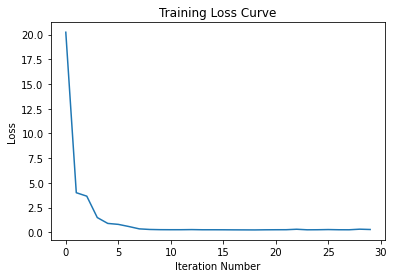

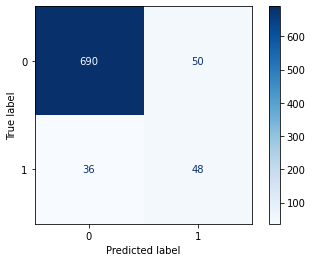

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       740
           1       0.49      0.57      0.53        84

    accuracy                           0.90       824
   macro avg       0.72      0.75      0.73       824
weighted avg       0.90      0.90      0.90       824



In [ ]:
# Define
model_1 = MLPClassifier(random_state=random_state, hidden_layer_sizes=(25,25))
# Fit
model_1 = model_1.fit(X_train,y_train)
# Architecture
print("MODEL ARCHITECTURE")
print("Number of Layers: "+str(model_1.n_layers_))
print("Number of Input Variables: "+str(model_1.n_features_in_))
print("Weight Coefficient Matrix Shape 1: "+str(model_1.coefs_[0].shape))
print("Weight Coefficient Matrix Shape 2: "+str(model_1.coefs_[1].shape))
print("Weight Coefficient Matrix Shape 3: "+str(model_1.coefs_[2].shape))
print("Bias Coefficient Vector Size 1: "+str(model_1.intercepts_[0].shape))
print("Bias Coefficient Vector Size 2: "+str(model_1.intercepts_[1].shape))
print("Bias Coefficient Vector Size 3: "+str(model_1.intercepts_[2].shape))
print("Total Number of Parameters: "+str(number_of_parameters(model_1)))
print("Number of Output Variables: "+str(model_1.n_outputs_))
print("Output Classes: "+str(model_1.classes_))
print("Output Activation Function: "+str(model_1.out_activation_))
print("\n")
# Training
print("MODEL TRAINING")
print("Number of Training Iterations: "+str(model_1.n_iter_))
print("Total Number of Training Samples: "+str(model_1.t_))
print("Current Loss: "+str(model_1.loss_))
print("Minimum Loss: "+str(model_1.best_loss_))
print("\n")
plt.plot(model_1.loss_curve_)
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()
# Predict
predictions_1_test = model_1.predict(X_test)
# Evaluate
con_mat_test = confusion_matrix(y_test,predictions_1_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_1_test))

###Cross-validation

In [ ]:
model_1_cv = MLPClassifier(random_state=random_state, hidden_layer_sizes=(25,25))
model_1_cv_results = pd.DataFrame(cross_validate(model_1_cv,X_train,y_train,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_1_cv_results = model_1_cv_results.drop(columns='score_time')
model_1_cv_results.loc['mean'] = model_1_cv_results.mean()
model_1_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.882977,0.895296,0.899393,0.750000,0.745763,0.082192,0.149660,0.148148,0.249292
1,0.930235,0.886191,0.906986,0.494737,0.578947,0.635135,0.600683,0.556213,0.589615
2,1.238180,0.898331,0.897494,0.818182,0.810811,0.121622,0.102389,0.211765,0.181818
3,1.091132,0.849544,0.851992,0.410959,0.416376,0.821918,0.812925,0.547945,0.550691
4,1.171865,0.901216,0.901328,0.548780,0.550000,0.616438,0.636054,0.580645,0.589905
mean,1.062878,0.886116,0.891439,0.604532,0.620379,0.455461,0.460342,0.408943,0.432264


##(c) 4 Hidden layers w/ 25 neurons ea.

###Pipeline

MODEL ARCHITECTURE
Number of Layers: 6
Number of Input Variables: 61
Weight Coefficient Matrix Shape 1: (61, 25)
Weight Coefficient Matrix Shape 2: (25, 25)
Weight Coefficient Matrix Shape 3: (25, 25)
Weight Coefficient Matrix Shape 4: (25, 25)
Weight Coefficient Matrix Shape 5: (25, 1)
Bias Coefficient Vector Size 1: (25,)
Bias Coefficient Vector Size 2: (25,)
Bias Coefficient Vector Size 3: (25,)
Bias Coefficient Vector Size 4: (25,)
Bias Coefficient Vector Size 5: (1,)
Total Number of Parameters: 3526
Number of Output Variables: 1
Output Classes: [0 1]
Output Activation Function: logistic


MODEL TRAINING
Number of Training Iterations: 29
Total Number of Training Samples: 95497
Current Loss: 0.28004563767672114
Minimum Loss: 0.2450023045607299




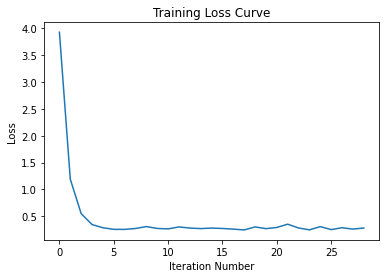

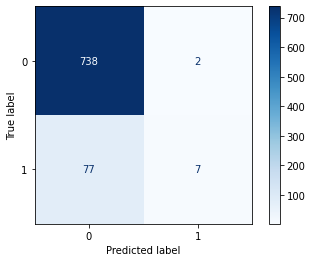

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       740
           1       0.78      0.08      0.15        84

    accuracy                           0.90       824
   macro avg       0.84      0.54      0.55       824
weighted avg       0.89      0.90      0.87       824



In [ ]:
# Define
model_2 = MLPClassifier(random_state=random_state, hidden_layer_sizes=(25,25,25,25))
# Fit
model_2 = model_2.fit(X_train,y_train)
# Architecture
print("MODEL ARCHITECTURE")
print("Number of Layers: "+str(model_2.n_layers_))
print("Number of Input Variables: "+str(model_2.n_features_in_))
print("Weight Coefficient Matrix Shape 1: "+str(model_2.coefs_[0].shape))
print("Weight Coefficient Matrix Shape 2: "+str(model_2.coefs_[1].shape))
print("Weight Coefficient Matrix Shape 3: "+str(model_2.coefs_[2].shape))
print("Weight Coefficient Matrix Shape 4: "+str(model_2.coefs_[3].shape))
print("Weight Coefficient Matrix Shape 5: "+str(model_2.coefs_[4].shape))
print("Bias Coefficient Vector Size 1: "+str(model_2.intercepts_[0].shape))
print("Bias Coefficient Vector Size 2: "+str(model_2.intercepts_[1].shape))
print("Bias Coefficient Vector Size 3: "+str(model_2.intercepts_[2].shape))
print("Bias Coefficient Vector Size 4: "+str(model_2.intercepts_[3].shape))
print("Bias Coefficient Vector Size 5: "+str(model_2.intercepts_[4].shape))
print("Total Number of Parameters: "+str(number_of_parameters(model_2)))
print("Number of Output Variables: "+str(model_2.n_outputs_))
print("Output Classes: "+str(model_2.classes_))
print("Output Activation Function: "+str(model_2.out_activation_))
print("\n")
# Training
print("MODEL TRAINING")
print("Number of Training Iterations: "+str(model_2.n_iter_))
print("Total Number of Training Samples: "+str(model_2.t_))
print("Current Loss: "+str(model_2.loss_))
print("Minimum Loss: "+str(model_2.best_loss_))
print("\n")
plt.plot(model_2.loss_curve_)
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()
# Predict
predictions_2_test = model_2.predict(X_test)
# Evaluate
con_mat_test = confusion_matrix(y_test,predictions_2_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_2_test))

###Cross-validation

In [ ]:
model_2_cv = MLPClassifier(random_state=random_state, hidden_layer_sizes=(25,25,25,25))
model_2_cv_results = pd.DataFrame(cross_validate(model_2_cv,X_train,y_train,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_2_cv_results = model_2_cv_results.drop(columns='score_time')
model_2_cv_results.loc['mean'] = model_2_cv_results.mean()
model_2_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,2.055811,0.889226,0.895596,0.500000,0.880000,0.013699,0.074830,0.026667,0.137931
1,0.926054,0.895296,0.897494,0.727273,0.896552,0.108108,0.088737,0.188235,0.161491
2,1.110144,0.899848,0.910023,0.666667,0.764151,0.216216,0.276451,0.326531,0.406015
3,1.269524,0.930091,0.913852,0.813953,0.718954,0.479452,0.374150,0.603448,0.492170
4,0.700511,0.708207,0.705503,0.270270,0.262327,0.958904,0.904762,0.421687,0.406728
mean,1.212409,0.864534,0.864494,0.595633,0.704397,0.355276,0.343786,0.313314,0.320867


##(d) Hidden layer w/ 125 neurons

###Pipeline

MODEL ARCHITECTURE
Number of Layers: 3
Number of Input Variables: 61
Weight Coefficient Matrix Shape 1: (61, 125)
Weight Coefficient Matrix Shape 2: (125, 1)
Bias Coefficient Vector Size 1: (125,)
Bias Coefficient Vector Size 2: (1,)
Total Number of Parameters: 7876
Number of Output Variables: 1
Output Classes: [0 1]
Output Activation Function: logistic


MODEL TRAINING
Number of Training Iterations: 26
Total Number of Training Samples: 85618
Current Loss: 0.34059
Minimum Loss: 0.29441




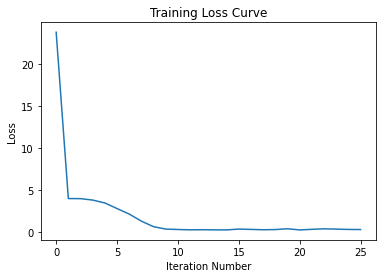

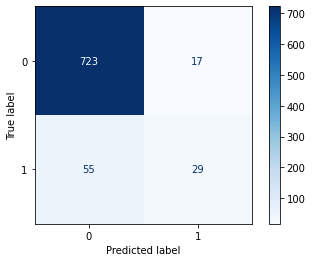

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       740
           1       0.63      0.35      0.45        84

    accuracy                           0.91       824
   macro avg       0.78      0.66      0.70       824
weighted avg       0.90      0.91      0.90       824



In [ ]:
# Define
model_3 = MLPClassifier(random_state=random_state, hidden_layer_sizes=(125))
# Fit
model_3 = model_3.fit(X_train,y_train)
# Architecture
print("MODEL ARCHITECTURE")
print("Number of Layers: "+str(model_3.n_layers_))
print("Number of Input Variables: "+str(model_3.n_features_in_))
print("Weight Coefficient Matrix Shape 1: "+str(model_3.coefs_[0].shape))
print("Weight Coefficient Matrix Shape 2: "+str(model_3.coefs_[1].shape))
print("Bias Coefficient Vector Size 1: "+str(model_3.intercepts_[0].shape))
print("Bias Coefficient Vector Size 2: "+str(model_3.intercepts_[1].shape))
print("Total Number of Parameters: "+str(number_of_parameters(model_3)))
print("Number of Output Variables: "+str(model_3.n_outputs_))
print("Output Classes: "+str(model_3.classes_))
print("Output Activation Function: "+str(model_3.out_activation_))
print("\n")
# Training
print("MODEL TRAINING")
print("Number of Training Iterations: "+str(model_3.n_iter_))
print("Total Number of Training Samples: "+str(model_3.t_))
print("Current Loss: "+str(model_3.loss_.round(5)))
print("Minimum Loss: "+str(model_3.best_loss_.round(5)))
print("\n")
plt.plot(model_3.loss_curve_)
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()
# Predict
predictions_3_test = model_3.predict(X_test)
# Evaluate
con_mat_test = confusion_matrix(y_test,predictions_3_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_3_test))

###Cross-validation

In [ ]:
model_3_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(125))
model_3_cv_results = pd.DataFrame(cross_validate(model_3_cv,X_train,y_train,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_3_cv_results = model_3_cv_results.drop(columns='score_time')
model_3_cv_results.loc['mean'] = model_3_cv_results.mean()
model_3_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.038170,0.895296,0.904328,0.700000,0.808824,0.095890,0.187075,0.168675,0.303867
1,0.753125,0.904401,0.906606,0.720000,0.752688,0.243243,0.238908,0.363636,0.362694
2,0.979153,0.908953,0.906606,0.888889,0.776471,0.216216,0.225256,0.347826,0.349206
3,1.171560,0.899696,0.892600,0.818182,0.739130,0.123288,0.057823,0.214286,0.107256
4,0.939732,0.898176,0.898672,0.875000,0.846154,0.095890,0.112245,0.172840,0.198198
mean,0.976348,0.901304,0.901762,0.800414,0.784653,0.154906,0.164261,0.253452,0.264244


##(e) Hidden layer w/ 5 neurons

### Pipeline

MODEL ARCHITECTURE
Number of Layers: 3
Number of Input Variables: 61
Weight Coefficient Matrix Shape 1: (61, 5)
Weight Coefficient Matrix Shape 2: (5, 1)
Bias Coefficient Vector Size 1: (5,)
Bias Coefficient Vector Size 2: (1,)
Total Number of Parameters: 316
Number of Output Variables: 1
Output Classes: [0 1]
Output Activation Function: logistic


MODEL TRAINING
Number of Training Iterations: 200
Total Number of Training Samples: 658600
Current Loss: 0.31328
Minimum Loss: 0.31328




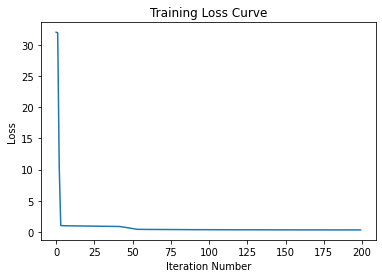

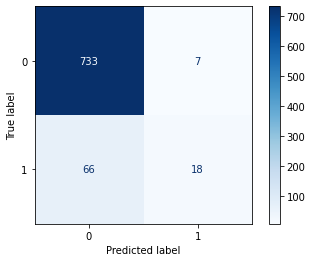

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       740
           1       0.72      0.21      0.33        84

    accuracy                           0.91       824
   macro avg       0.82      0.60      0.64       824
weighted avg       0.90      0.91      0.89       824



In [ ]:
# Define
model_4 = MLPClassifier(random_state=random_state, hidden_layer_sizes=(5))
# Fit
model_4 = model_4.fit(X_train,y_train)
# Architecture
print("MODEL ARCHITECTURE")
print("Number of Layers: "+str(model_4.n_layers_))
print("Number of Input Variables: "+str(model_4.n_features_in_))
print("Weight Coefficient Matrix Shape 1: "+str(model_4.coefs_[0].shape))
print("Weight Coefficient Matrix Shape 2: "+str(model_4.coefs_[1].shape))
print("Bias Coefficient Vector Size 1: "+str(model_4.intercepts_[0].shape))
print("Bias Coefficient Vector Size 2: "+str(model_4.intercepts_[1].shape))
print("Total Number of Parameters: "+str(number_of_parameters(model_4)))
print("Number of Output Variables: "+str(model_4.n_outputs_))
print("Output Classes: "+str(model_4.classes_))
print("Output Activation Function: "+str(model_4.out_activation_))
print("\n")
# Training
print("MODEL TRAINING")
print("Number of Training Iterations: "+str(model_4.n_iter_))
print("Total Number of Training Samples: "+str(model_4.t_))
print("Current Loss: "+str(model_4.loss_.round(5)))
print("Minimum Loss: "+str(model_4.best_loss_.round(5)))
print("\n")
plt.plot(model_4.loss_curve_)
plt.xlabel('Iteration Number')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()
# Predict
predictions_4_test = model_4.predict(X_test)
# Evaluate
con_mat_test = confusion_matrix(y_test,predictions_4_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_4_test))

###Cross-validation

In [ ]:
model_4_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(5))
model_4_cv_results = pd.DataFrame(cross_validate(model_4_cv,X_train,y_train,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_4_cv_results = model_4_cv_results.drop(columns='score_time')
model_4_cv_results.loc['mean'] = model_4_cv_results.mean()
model_4_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.422994,0.896813,0.906606,0.666667,0.766667,0.136986,0.234694,0.227273,0.359375
1,1.449878,0.904401,0.905087,0.720000,0.772152,0.243243,0.208191,0.363636,0.327957
2,1.453995,0.908953,0.904708,0.818182,0.769231,0.243243,0.204778,0.375000,0.323450
3,1.414790,0.911854,0.903226,0.857143,0.753247,0.246575,0.197279,0.382979,0.312668
4,1.439213,0.898176,0.905882,0.636364,0.773810,0.191781,0.221088,0.294737,0.343915
mean,1.436174,0.904039,0.905102,0.739671,0.767021,0.212366,0.213206,0.328725,0.333473


#Task III: Multi-Layer Perceptron Hyperparameter Tuning

##Learning Rate Initialization (Step Size)

In [ ]:
model_5_cv = MLPClassifier(random_state=random_state, hidden_layer_sizes=(25),learning_rate_init=0.005)
model_5_cv_results = pd.DataFrame(cross_validate(model_5_cv,X_train,y_train,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_5_cv_results = model_5_cv_results.drop(columns='score_time')
model_5_cv_results.loc['mean'] = model_5_cv_results.mean()
model_5_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.390978,0.889226,0.898254,0.500000,0.536111,0.534247,0.656463,0.516556,0.590214
1,0.803668,0.851290,0.880790,0.416667,0.477987,0.810811,0.778157,0.550459,0.592208
2,0.397563,0.916540,0.913060,0.686275,0.653846,0.472973,0.464164,0.560000,0.542914
3,0.371357,0.925532,0.916129,0.740000,0.689119,0.506849,0.452381,0.601626,0.546201
4,0.450733,0.911854,0.900190,0.597403,0.544413,0.630137,0.646259,0.613333,0.590980
mean,0.482860,0.898888,0.901684,0.588069,0.580295,0.591003,0.599485,0.568395,0.572503


*   After testing with diffrent values on the initial step size, this model had a big improvement in its mean f1 testing score when the initial learning rate was set to 0.005. This value seemed to give this model the best initial step to reach the minimized loss.

In [ ]:
model_6_cv = MLPClassifier(random_state=random_state, hidden_layer_sizes=(25),learning_rate_init=0.0000007)
model_6_cv_results = pd.DataFrame(cross_validate(model_6_cv,X_train,y_train,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_6_cv_results = model_6_cv_results.drop(columns='score_time')
model_6_cv_results.loc['mean'] = model_6_cv_results.mean()
model_6_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.229224,0.110774,0.110099,0.110774,0.110266,1.000000,0.986395,0.199454,0.198358
1,0.237423,0.112291,0.109719,0.112291,0.109886,1.000000,0.986348,0.201910,0.197742
2,1.265539,0.110774,0.109339,0.110942,0.109250,0.986486,0.979522,0.199454,0.196575
3,3.345904,0.106383,0.109677,0.105666,0.109292,0.945205,0.976190,0.190083,0.196575
4,3.322839,0.104863,0.110057,0.105505,0.109333,0.945205,0.976190,0.189821,0.196643
mean,1.680186,0.109017,0.109778,0.109036,0.109605,0.975379,0.980929,0.196144,0.197179


*   In this model, the first step size was drastically lowered to 0.0000007, which ruined its mean f1 testing score. It seems like that initial learning rate was too low for the model to catch up to with its weight adjustments to reach the minimized loss.

##Activation

In [ ]:
model_7_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(25),activation='relu')
model_7_cv_results = pd.DataFrame(cross_validate(model_7_cv,X_train,y_train,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_7_cv_results = model_7_cv_results.drop(columns='score_time')
model_7_cv_results.loc['mean'] = model_7_cv_results.mean()
model_7_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.607284,0.904401,0.915338,0.692308,0.735099,0.246575,0.377551,0.363636,0.498876
1,1.019886,0.902883,0.914958,0.558140,0.635294,0.648649,0.552901,0.600000,0.591241
2,0.828128,0.916540,0.914199,0.731707,0.703030,0.405405,0.395904,0.521739,0.506550
3,0.624890,0.919453,0.914611,0.666667,0.650655,0.547945,0.506803,0.601504,0.569790
4,1.138044,0.916413,0.916888,0.750000,0.724551,0.369863,0.411565,0.495413,0.524946
mean,0.843646,0.911938,0.915199,0.679764,0.689726,0.443688,0.448945,0.516458,0.538281


* The activation function for this model was changed to the Rectified Linear Unit function and it had no effects on the original mean testing f1 score.

In [ ]:
model_8_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(25),activation='logistic')
model_8_cv_results = pd.DataFrame(cross_validate(model_8_cv,X_train,y_train,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_8_cv_results = model_8_cv_results.drop(columns='score_time')
model_8_cv_results.loc['mean'] = model_8_cv_results.mean()
model_8_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,1.282230,0.889226,0.888383,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.318681,0.918058,0.911541,0.692308,0.694805,0.486486,0.365188,0.571429,0.478747
2,1.744622,0.908953,0.915338,0.718750,0.708333,0.310811,0.406143,0.433962,0.516269
3,1.487409,0.919453,0.911575,0.666667,0.644550,0.547945,0.462585,0.601504,0.538614
4,1.214594,0.890578,0.888805,1.000000,0.666667,0.013699,0.006803,0.027027,0.013468
mean,1.409507,0.905253,0.903128,0.615545,0.542871,0.271788,0.248144,0.326784,0.309420


* The activation function for this model was changed to Sigmoid and it lowered the mean testing f1 score by more than a half. If I was to take a very uneducated guess on why, I'd assume it's because our input data has no negative inputs???

##Alpha (Regularization)

In [ ]:
model_9_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(25),alpha=0.001)
model_9_cv_results = pd.DataFrame(cross_validate(model_9_cv,X_train,y_train,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_9_cv_results = model_9_cv_results.drop(columns='score_time')
model_9_cv_results.loc['mean'] = model_9_cv_results.mean()
model_9_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.650864,0.901366,0.911541,0.666667,0.719424,0.219178,0.340136,0.329897,0.461894
1,0.983244,0.898331,0.915718,0.563636,0.707602,0.418919,0.412969,0.480620,0.521552
2,0.825157,0.905918,0.915338,0.603448,0.648305,0.472973,0.522184,0.530303,0.578450
3,0.910465,0.917933,0.907780,0.611765,0.577508,0.712329,0.646259,0.658228,0.609952
4,1.147370,0.914894,0.916888,0.729730,0.724551,0.369863,0.411565,0.490909,0.524946
mean,0.903420,0.907688,0.913453,0.635049,0.675478,0.438652,0.466623,0.497991,0.539359


*   After testing with diffrent values on alpha, this model had a small decay in its mean f1 testing score when the value of alpha was set to 0.001. This was an expected side effect of limitting the models complexity to avoid overfitting.

In [ ]:
model_10_cv = MLPClassifier(random_state=random_state,hidden_layer_sizes=(25),alpha=0.000000001)
model_10_cv_results = pd.DataFrame(cross_validate(model_10_cv,X_train,y_train,cv=5,return_train_score=True,scoring=['accuracy','precision','recall','f1']))
model_10_cv_results = model_10_cv_results.drop(columns='score_time')
model_10_cv_results.loc['mean'] = model_10_cv_results.mean()
model_10_cv_results

,fit_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.642419,0.904401,0.915338,0.692308,0.735099,0.246575,0.377551,0.363636,0.498876
1,0.989233,0.907436,0.915338,0.582278,0.648305,0.621622,0.522184,0.601307,0.578450
2,0.828951,0.918058,0.914199,0.750000,0.703030,0.405405,0.395904,0.526316,0.506550
3,0.853278,0.922492,0.907780,0.644737,0.585859,0.671233,0.591837,0.657718,0.588832
4,1.145900,0.916413,0.916888,0.736842,0.721893,0.383562,0.414966,0.504505,0.526998
mean,0.891956,0.913760,0.913909,0.681233,0.678837,0.465679,0.460488,0.530696,0.539941


*   For this model, the value of alpha was dropped to near zero at 0.000000001 in order to allow overfitting. The model performed a bit better in its mean f1 testing score but it is by no means regularized.

#Task IV: Automated MLP Architecture and Hyperparameter Tuning

##A. Grid Search

In [ ]:
parameters = {'hidden_layer_sizes':[(25),(25,25),(25,25,25,25),(125),(5)],
              'activation':['relu','logistic'],
              'learning_rate_init':[0.005,0.0000007],
              'alpha':[0.001,0.000000001]
              }
mlp = MLPClassifier(random_state=random_state)
mlp_tuning_grid = GridSearchCV(mlp,parameters,scoring='f1',verbose=3)
mlp_tuning_grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=25, learning_rate_init=0.005;, score=0.449 total time=   0.6s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=25, learning_rate_init=0.005;, score=0.575 total time=   0.4s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=25, learning_rate_init=0.005;, score=0.508 total time=   0.5s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=25, learning_rate_init=0.005;, score=0.641 total time=   0.6s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=25, learning_rate_init=0.005;, score=0.175 total time=   0.6s
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=25, learning_rate_init=7e-07;, score=0.199 total time=   0.2s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=25, learning_rate_init=7e-07;, score=0.202 total time=   0.3s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=25, lear

GridSearchCV(estimator=MLPClassifier(random_state=0),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.001, 1e-09],
                         'hidden_layer_sizes': [25, (25, 25), (25, 25, 25, 25),
                                                125, 5],
                         'learning_rate_init': [0.005, 7e-07]},
             scoring='f1', verbose=3)

##B. Architecture and hyperparameter combinations

*   There was a total of 40 architecture and hyperparameter combinations. There are 5 different Multi-Layer perceptrons, 2 activation functions, 2 initial step sizes, and 2 alpha hyperparamaters. This leads us to multiply all the possible combinations of them together, ie ... 5 x 2 x 2 x 2 = 40

##C. Total Models Evaluated

*   There was a total 200 models that were evaluated. If there is a maximum of 40 possible architecture and hyperparameter combinations, and each cross-validation another model for evaluation, it leads us to multiply the number of all combinations by the number of cross-validation models that will happen each time, ie... 40 x 5 = 200

##D. Droping columns related to scoring & fitting times

In [ ]:
mlp_tuning_grid_df = pd.DataFrame(mlp_tuning_grid.cv_results_)
mlp_tuning_grid_df = mlp_tuning_grid_df.drop(columns=['mean_score_time','std_score_time','mean_fit_time','std_fit_time'])
print("Hyperparameter Search Grid Size: "+str(mlp_tuning_grid_df.shape))

Hyperparameter Search Grid Size: (40, 13)


##E. Best Five Models

In [ ]:
mlp_tuning_grid_df.sort_values('mean_test_score',ascending=False).head(5)

,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,relu,0.001,125,0.005,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.486111,0.377358,0.450450,0.576923,0.654762,0.509121,0.097099,1
16,relu,0.0,125,0.005,"{'activation': 'relu', 'alpha': 1e-09, 'hidden...",0.463576,0.468966,0.216867,0.554622,0.682927,0.477392,0.152541,2
0,relu,0.001,25,0.005,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.448598,0.575342,0.508197,0.640884,0.175000,0.469604,0.160773,3
14,relu,0.0,"(25, 25, 25, 25)",0.005,"{'activation': 'relu', 'alpha': 1e-09, 'hidden...",0.439024,0.306080,0.336634,0.472727,0.556962,0.422285,0.091436,4
4,relu,0.001,"(25, 25, 25, 25)",0.005,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.502674,0.576271,0.258065,0.211765,0.551181,0.419991,0.153655,5


##F. Evaluate Best Model

In [ ]:
best_mlp_model = mlp_tuning_grid.best_estimator_
best_mlp_model

MLPClassifier(alpha=0.001, hidden_layer_sizes=125, learning_rate_init=0.005,
              random_state=0)

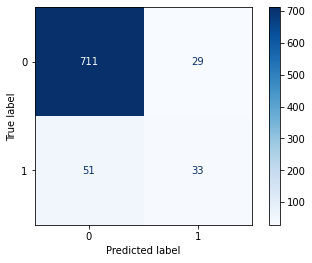

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       740
           1       0.53      0.39      0.45        84

    accuracy                           0.90       824
   macro avg       0.73      0.68      0.70       824
weighted avg       0.89      0.90      0.90       824



In [ ]:
predictions_best_test = best_mlp_model.predict(X_test)

con_mat_test = confusion_matrix(y_test,predictions_best_test,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_best_test))

##G. Plots

###(i)

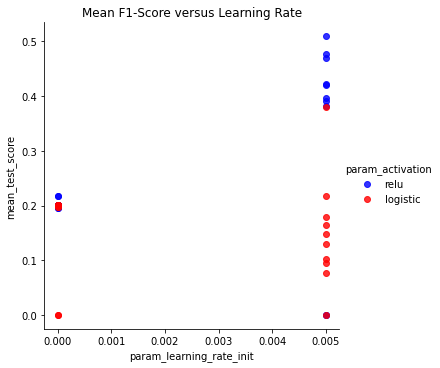

In [ ]:
colors = {'relu':'blue', 'logistic':'red'}
sns.lmplot('param_learning_rate_init','mean_test_score',data=mlp_tuning_grid_df,palette=colors,hue='param_activation',fit_reg=False)
plt.title("Mean F1-Score versus Learning Rate")
plt.show()

###(ii)

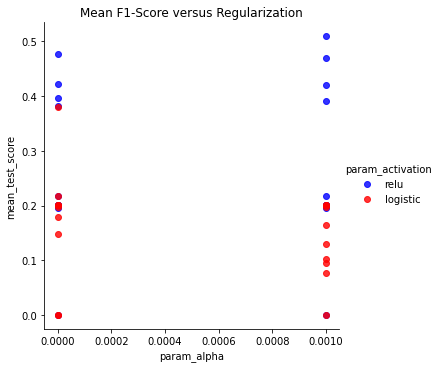

In [ ]:
colors = {'relu':'blue', 'logistic':'red'}
sns.lmplot('param_alpha','mean_test_score',data=mlp_tuning_grid_df,palette=colors,hue='param_activation',fit_reg=False)
plt.title("Mean F1-Score versus Regularization")
plt.show()

###(iii)

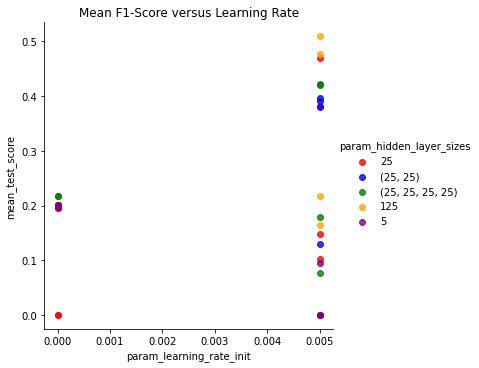

In [ ]:
colors = {(25):'red',(25,25):'blue',(25,25,25,25):'green',(125):'orange',(5):'purple'}
sns.lmplot('param_learning_rate_init','mean_test_score',data=mlp_tuning_grid_df,palette=colors,hue='param_hidden_layer_sizes',fit_reg=False)
plt.title("Mean F1-Score versus Learning Rate")
plt.show()

###(iv)

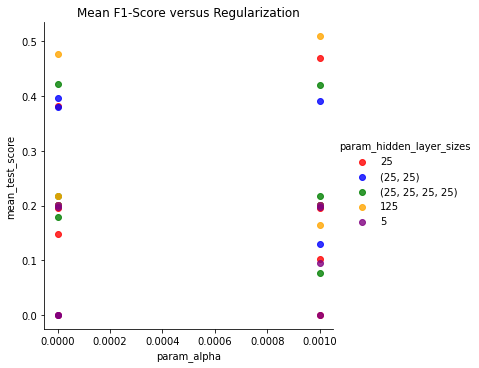

In [ ]:
colors = {(25):'red',(25,25):'blue',(25,25,25,25):'green',(125):'orange',(5):'purple'}
sns.lmplot('param_alpha','mean_test_score',data=mlp_tuning_grid_df,palette=colors,hue='param_hidden_layer_sizes',fit_reg=False)
plt.title("Mean F1-Score versus Regularization")
plt.show()

##H. Randomized Grid Search

In [ ]:
parameters = {'hidden_layer_sizes':[(25),(25,25),(25,25,25,25),(125),(5)],
              'activation':['relu','logistic'],
              'learning_rate_init':[0.005,0.0000007],
              'alpha':[0.001,0.000000001]
              }
mlp = MLPClassifier(random_state=random_state)
mlp_tuning_grid_randomized = RandomizedSearchCV(mlp,parameters,scoring='f1',verbose=3)
mlp_tuning_grid_randomized.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END activation=relu, alpha=0.001, hidden_layer_sizes=25, learning_rate_init=7e-07;, score=0.199 total time=   0.3s
[CV 2/5] END activation=relu, alpha=0.001, hidden_layer_sizes=25, learning_rate_init=7e-07;, score=0.202 total time=   0.2s
[CV 3/5] END activation=relu, alpha=0.001, hidden_layer_sizes=25, learning_rate_init=7e-07;, score=0.199 total time=   1.3s
[CV 4/5] END activation=relu, alpha=0.001, hidden_layer_sizes=25, learning_rate_init=7e-07;, score=0.190 total time=   3.5s
[CV 5/5] END activation=relu, alpha=0.001, hidden_layer_sizes=25, learning_rate_init=7e-07;, score=0.190 total time=   9.3s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=125, learning_rate_init=0.005;, score=0.000 total time=   0.9s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=125, learning_rate_init=0.005;, score=0.000 total time=   0.9s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_s

RandomizedSearchCV(estimator=MLPClassifier(random_state=0),
                   param_distributions={'activation': ['relu', 'logistic'],
                                        'alpha': [0.001, 1e-09],
                                        'hidden_layer_sizes': [25, (25, 25),
                                                               (25, 25, 25, 25),
                                                               125, 5],
                                        'learning_rate_init': [0.005, 7e-07]},
                   scoring='f1', verbose=3)

In [ ]:
mlp_tuning_grid_randomized_df = pd.DataFrame(mlp_tuning_grid_randomized.cv_results_)
mlp_tuning_grid_randomized_df = mlp_tuning_grid_randomized_df.drop(columns=['mean_score_time','std_score_time','mean_fit_time','std_fit_time'])
print("Hyperparameter Search Grid Size: "+str(mlp_tuning_grid_randomized_df.shape))

Hyperparameter Search Grid Size: (10, 13)


In [ ]:
mlp_tuning_grid_randomized_df.sort_values('mean_test_score',ascending=False).head(5)

,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,param_activation,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.005,25,0.001,relu,"{'learning_rate_init': 0.005, 'hidden_layer_si...",0.448598,0.575342,0.508197,0.640884,0.175000,0.469604,0.160773,1
8,0.005,25,0.0,relu,"{'learning_rate_init': 0.005, 'hidden_layer_si...",0.474138,0.557823,0.052632,0.603774,0.216867,0.381047,0.211818,2
5,0.005,"(25, 25)",0.0,logistic,"{'learning_rate_init': 0.005, 'hidden_layer_si...",0.457831,0.342857,0.255814,0.556522,0.285714,0.379748,0.112169,3
3,0.000001,125,0.0,logistic,"{'learning_rate_init': 7e-07, 'hidden_layer_si...",0.199454,0.201910,0.201910,0.199726,0.199726,0.200545,0.001119,4
6,0.000001,"(25, 25, 25, 25)",0.001,logistic,"{'learning_rate_init': 7e-07, 'hidden_layer_si...",0.199454,0.201910,0.201910,0.199726,0.199726,0.200545,0.001119,4


In [ ]:
best_mlp_model_randomized = mlp_tuning_grid_randomized.best_estimator_
best_mlp_model_randomized

MLPClassifier(alpha=0.001, hidden_layer_sizes=25, learning_rate_init=0.005,
              random_state=0)

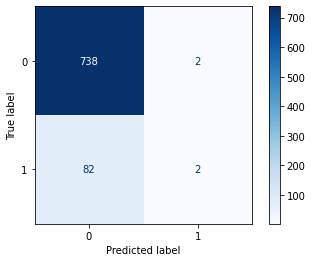

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       740
           1       0.50      0.02      0.05        84

    accuracy                           0.90       824
   macro avg       0.70      0.51      0.50       824
weighted avg       0.86      0.90      0.85       824



In [ ]:
predictions_best_test_randomized = best_mlp_model_randomized.predict(X_test)

con_mat_test_randomized = confusion_matrix(y_test,predictions_best_test_randomized,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test_randomized,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_best_test_randomized))

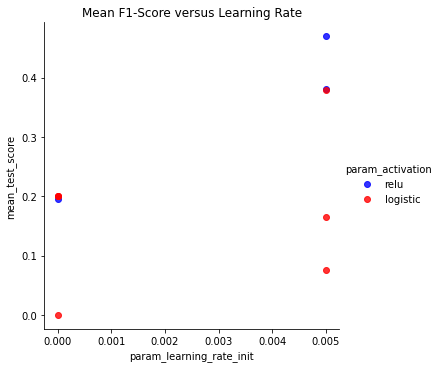

In [ ]:
colors = {'relu':'blue', 'logistic':'red'}
sns.lmplot('param_learning_rate_init','mean_test_score',data=mlp_tuning_grid_randomized_df,palette=colors,hue='param_activation',fit_reg=False)
plt.title("Mean F1-Score versus Learning Rate")
plt.show()

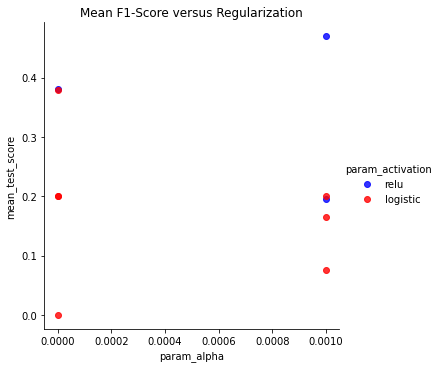

In [ ]:
colors = {'relu':'blue', 'logistic':'red'}
sns.lmplot('param_alpha','mean_test_score',data=mlp_tuning_grid_randomized_df,palette=colors,hue='param_activation',fit_reg=False)
plt.title("Mean F1-Score versus Regularization")
plt.show()

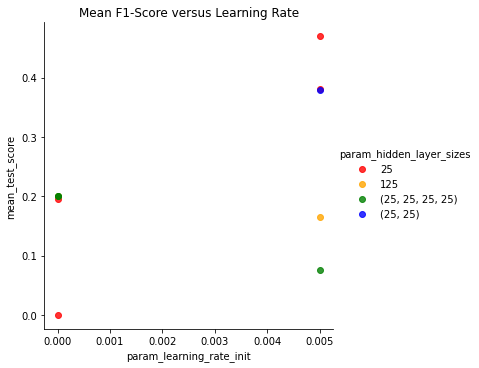

In [ ]:
colors = {(25):'red',(25,25):'blue',(25,25,25,25):'green',(125):'orange',(5):'pink'}
sns.lmplot('param_learning_rate_init','mean_test_score',data=mlp_tuning_grid_randomized_df,palette=colors,hue='param_hidden_layer_sizes',fit_reg=False)
plt.title("Mean F1-Score versus Learning Rate")
plt.show()

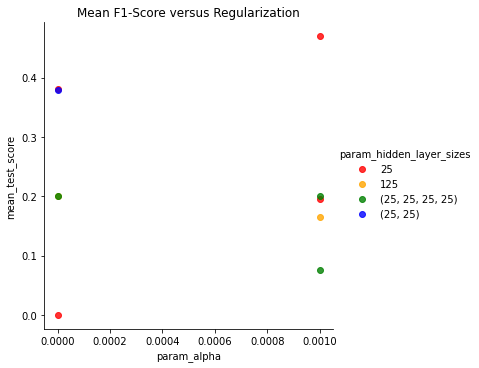

In [ ]:
colors = {(25):'red',(25,25):'blue',(25,25,25,25):'green',(125):'orange',(5):'pink'}
sns.lmplot('param_alpha','mean_test_score',data=mlp_tuning_grid_randomized_df,palette=colors,hue='param_hidden_layer_sizes',fit_reg=False)
plt.title("Mean F1-Score versus Regularization")
plt.show()

##I. Sequential tuning vs. the Randomized tuning process

*   Compared to equential tuning process, the Randomized tuning process had much shorter processing times, and while it did have similar outcomes, it didn't return the best possible models. In the real world when there are a lot more models for us to go through, I think it would be more effecient to run the Randomized tuning process due to its processing times.

#Task V: Automated Support Vector Machine Tuning

##A. Sequential SVM Grid Search

In [ ]:
parameters = {'C':[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
              'kernel':['rbf','sigmoid']
              }
svc_sequential = SVC(random_state=random_state)
svm_tuning_grid = GridSearchCV(svc_sequential,parameters,scoring='f1',verbose=3)
svm_tuning_grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ...................C=5, kernel=rbf;, score=0.239 total time=   0.2s
[CV 2/5] END ...................C=5, kernel=rbf;, score=0.340 total time=   0.2s
[CV 3/5] END ...................C=5, kernel=rbf;, score=0.384 total time=   0.2s
[CV 4/5] END ...................C=5, kernel=rbf;, score=0.416 total time=   0.2s
[CV 5/5] END ...................C=5, kernel=rbf;, score=0.303 total time=   0.2s
[CV 1/5] END ...............C=5, kernel=sigmoid;, score=0.242 total time=   0.2s
[CV 2/5] END ...............C=5, kernel=sigmoid;, score=0.343 total time=   0.3s
[CV 3/5] END ...............C=5, kernel=sigmoid;, score=0.371 total time=   0.2s
[CV 4/5] END ...............C=5, kernel=sigmoid;, score=0.256 total time=   0.2s
[CV 5/5] END ...............C=5, kernel=sigmoid;, score=0.286 total time=   0.2s
[CV 1/5] END ..................C=10, kernel=rbf;, score=0.289 total time=   0.2s
[CV 2/5] END ..................C=10, kernel=rbf

GridSearchCV(estimator=SVC(random_state=0),
             param_grid={'C': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60,
                               65, 70, 75, 80, 85, 90, 95, 100],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='f1', verbose=3)

 

*   There was a total of 40 architecture and hyperparameter combinations. 20 possible architecture structures x 2 hyper paramaters = 40 total canidates

*   40 combinations x 5 folds at each cross-validation = 200 fits

In [ ]:
svm_tuning_grid_df = pd.DataFrame(svm_tuning_grid.cv_results_)
svm_tuning_grid_df = svm_tuning_grid_df.drop(columns=['mean_score_time','std_score_time','mean_fit_time','std_fit_time'])
print("Hyperparameter Search Grid Size: "+str(svm_tuning_grid_df.shape))

Hyperparameter Search Grid Size: (40, 11)


In [ ]:
svm_tuning_grid_df.sort_values('mean_test_score',ascending=False).head(5)

,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,60,sigmoid,"{'C': 60, 'kernel': 'sigmoid'}",0.411215,0.438596,0.446429,0.532110,0.424779,0.450626,0.042481,1
25,65,sigmoid,"{'C': 65, 'kernel': 'sigmoid'}",0.411215,0.456140,0.442478,0.490566,0.421053,0.444290,0.027997,2
21,55,sigmoid,"{'C': 55, 'kernel': 'sigmoid'}",0.380952,0.442478,0.438596,0.495238,0.432432,0.437939,0.036282,3
39,100,sigmoid,"{'C': 100, 'kernel': 'sigmoid'}",0.392857,0.512397,0.434783,0.433962,0.413793,0.437558,0.040458,4
27,70,sigmoid,"{'C': 70, 'kernel': 'sigmoid'}",0.407407,0.448276,0.414414,0.490566,0.421053,0.436343,0.030445,5


In [ ]:
best_svm_model = svm_tuning_grid.best_estimator_
best_svm_model

SVC(C=60, kernel='sigmoid', random_state=0)

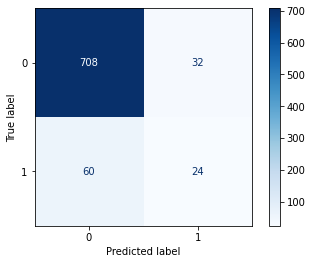

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       740
           1       0.43      0.29      0.34        84

    accuracy                           0.89       824
   macro avg       0.68      0.62      0.64       824
weighted avg       0.87      0.89      0.88       824



In [ ]:
predictions_best_test_svm = best_svm_model.predict(X_test)

con_mat_test_svm = confusion_matrix(y_test,predictions_best_test_svm,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test_svm,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_best_test_svm))

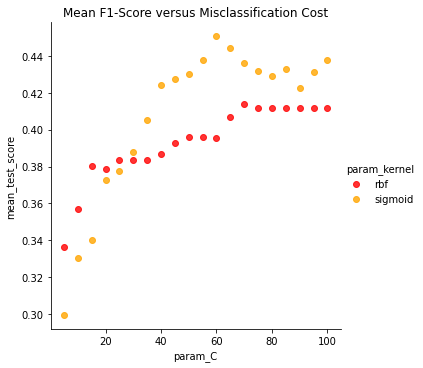

In [ ]:
colors = {'sigmoid':'orange','rbf':'red'}
sns.lmplot('param_C', 'mean_test_score', data=svm_tuning_grid_df,palette=colors,hue='param_kernel',fit_reg=False)
plt.title("Mean F1-Score versus Misclassification Cost")
plt.show()

##B. Randomized SVM Grid Search

In [ ]:
parameters = {'C':[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
              'kernel':['rbf','sigmoid']
              }
svc_random_grid = SVC(random_state=random_state)
svm_tuning_grid_randomized = RandomizedSearchCV(svc_random_grid,parameters,scoring='f1',verbose=3)
svm_tuning_grid_randomized.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..................C=25, kernel=rbf;, score=0.323 total time=   0.2s
[CV 2/5] END ..................C=25, kernel=rbf;, score=0.378 total time=   0.2s
[CV 3/5] END ..................C=25, kernel=rbf;, score=0.404 total time=   0.2s
[CV 4/5] END ..................C=25, kernel=rbf;, score=0.509 total time=   0.2s
[CV 5/5] END ..................C=25, kernel=rbf;, score=0.303 total time=   0.2s
[CV 1/5] END ..................C=80, kernel=rbf;, score=0.365 total time=   0.2s
[CV 2/5] END ..................C=80, kernel=rbf;, score=0.441 total time=   0.2s
[CV 3/5] END ..................C=80, kernel=rbf;, score=0.426 total time=   0.2s
[CV 4/5] END ..................C=80, kernel=rbf;, score=0.523 total time=   0.2s
[CV 5/5] END ..................C=80, kernel=rbf;, score=0.303 total time=   0.2s
[CV 1/5] END ..................C=60, kernel=rbf;, score=0.365 total time=   0.2s
[CV 2/5] END ..................C=60, kernel=rbf;

RandomizedSearchCV(estimator=SVC(random_state=0),
                   param_distributions={'C': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60, 65, 70, 75, 80, 85,
                                              90, 95, 100],
                                        'kernel': ['rbf', 'sigmoid']},
                   scoring='f1', verbose=3)

In [ ]:
svm_tuning_grid_randomized_df = pd.DataFrame(svm_tuning_grid_randomized.cv_results_)
svm_tuning_grid_randomized_df = svm_tuning_grid_randomized_df.drop(columns=['mean_score_time','std_score_time','mean_fit_time','std_fit_time'])
print("Hyperparameter Search Grid Size: "+str(svm_tuning_grid_randomized_df.shape))

Hyperparameter Search Grid Size: (10, 11)


In [ ]:
svm_tuning_grid_randomized_df.sort_values('mean_test_score',ascending=False).head(5)

,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,sigmoid,60,"{'kernel': 'sigmoid', 'C': 60}",0.411215,0.438596,0.446429,0.532110,0.424779,0.450626,0.042481,1
9,sigmoid,65,"{'kernel': 'sigmoid', 'C': 65}",0.411215,0.456140,0.442478,0.490566,0.421053,0.444290,0.027997,2
7,sigmoid,95,"{'kernel': 'sigmoid', 'C': 95}",0.389381,0.495868,0.421053,0.423077,0.427350,0.431346,0.034970,3
6,sigmoid,50,"{'kernel': 'sigmoid', 'C': 50}",0.368932,0.438596,0.414414,0.495238,0.432432,0.429923,0.040763,4
1,rbf,80,"{'kernel': 'rbf', 'C': 80}",0.365385,0.440678,0.425926,0.522523,0.303030,0.411508,0.073862,5


In [ ]:
best_svm_model_randomized = svm_tuning_grid_randomized.best_estimator_
best_svm_model_randomized

SVC(C=60, kernel='sigmoid', random_state=0)

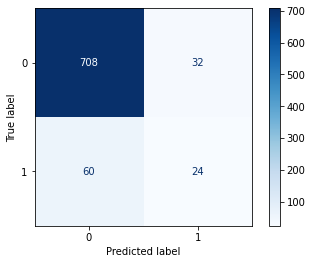

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       740
           1       0.43      0.29      0.34        84

    accuracy                           0.89       824
   macro avg       0.68      0.62      0.64       824
weighted avg       0.87      0.89      0.88       824



In [ ]:
predictions_best_test_svm_randomized = best_svm_model_randomized.predict(X_test)

con_mat_test_svm_randomized = confusion_matrix(y_test,predictions_best_test_svm_randomized,labels=[0,1])
ax = ConfusionMatrixDisplay(confusion_matrix=con_mat_test_svm_randomized,display_labels=[0,1])
ax.plot(values_format='',cmap=plt.cm.Blues)
plt.show()
print(classification_report(y_test,predictions_best_test_svm_randomized))

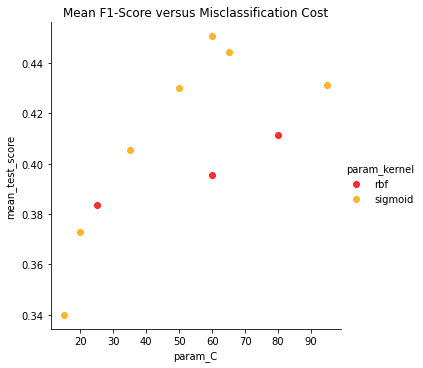

In [ ]:
colors = {'sigmoid':'orange','rbf':'red'}
sns.lmplot('param_C', 'mean_test_score', data=svm_tuning_grid_randomized_df,palette=colors,hue='param_kernel',fit_reg=False)
plt.title("Mean F1-Score versus Misclassification Cost")
plt.show()

*   The SVMs seemed to perform much better in this dataset than the MLP models, the fitting and scoring times (w/ the hyperparamaters we chose) of the SVMs were significantly quicker, and although our MLP models had a few scores that were better, the SVM models were consistent in their mean f1-scores across the board (sequiential or randomized). Last but not least, as we expected, running the randomized SVM grid had close enough mean f1 scores to our sequential grid but with a considerable amount of improvement in effeciency in fitting and scoring times.

#Task VI: HTML Conversion

In [ ]:
%%shell
 jupyter nbconvert --to html Assignment7_Abed_Abdulrahman.ipynb

[NbConvertApp] Converting notebook Assignment7_Abed_Abdulrahman.ipynb to html
[NbConvertApp] Writing 939905 bytes to Assignment7_Abed_Abdulrahman.html
